In [1]:
!pip install dmba

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeRegressor

from dmba import classificationSummary
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import networkx as nx
from sklearn.ensemble import RandomForestClassifier
from dmba import classificationSummary, plotDecisionTree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = pd.read_csv('laptop_prices.csv')

In [4]:
df.info

<bound method DataFrame.info of      Company                              Product            TypeName  Inches  \
0      Apple                          MacBook Pro           Ultrabook    13.3   
1      Apple                          Macbook Air           Ultrabook    13.3   
2         HP                               250 G6            Notebook    15.6   
3      Apple                          MacBook Pro           Ultrabook    15.4   
4      Apple                          MacBook Pro           Ultrabook    13.3   
...      ...                                  ...                 ...     ...   
1270  Lenovo                       Yoga 500-14ISK  2 in 1 Convertible    14.0   
1271  Lenovo                       Yoga 900-13ISK  2 in 1 Convertible    13.3   
1272  Lenovo                   IdeaPad 100S-14IBR            Notebook    14.0   
1273      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook    15.6   
1274    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook    15.6

In [5]:
df.head(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
5,Acer,Aspire 3,Notebook,15.6,4,Windows 10,2.10,400.00,Standard,1366,...,No,AMD,3.0,A9-Series 9420,500,0,HDD,No,AMD,Radeon R5
6,Apple,MacBook Pro,Ultrabook,15.4,16,Mac OS X,2.04,2139.97,Standard,2880,...,Yes,Intel,2.2,Core i7,256,0,Flash Storage,No,Intel,Iris Pro Graphics
7,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,1158.70,Standard,1440,...,No,Intel,1.8,Core i5,256,0,Flash Storage,No,Intel,HD Graphics 6000
8,Asus,ZenBook UX430UN,Ultrabook,14.0,16,Windows 10,1.30,1495.00,Full HD,1920,...,No,Intel,1.8,Core i7 8550U,512,0,SSD,No,Nvidia,GeForce MX150
9,Acer,Swift 3,Ultrabook,14.0,8,Windows 10,1.60,770.00,Full HD,1920,...,No,Intel,1.6,Core i5 8250U,256,0,SSD,No,Intel,UHD Graphics 620


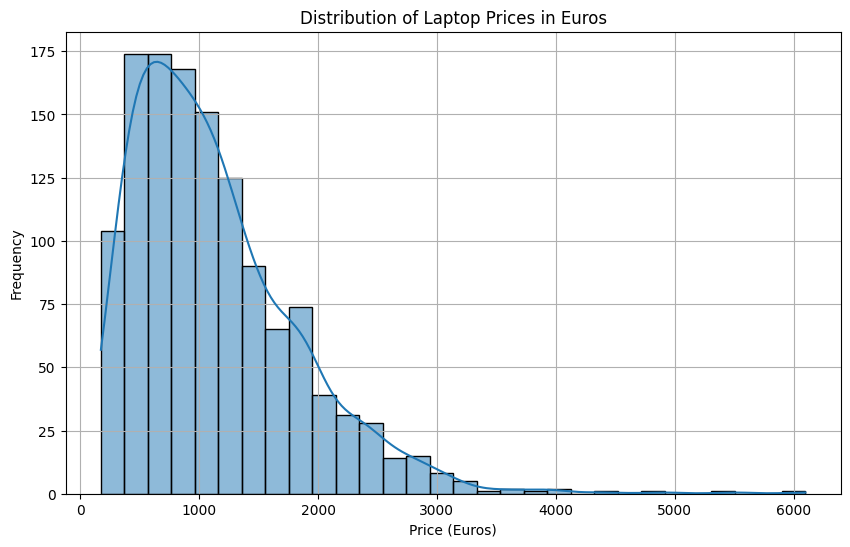

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Price_euros'], kde=True, bins=30)
plt.title('Distribution of Laptop Prices in Euros')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

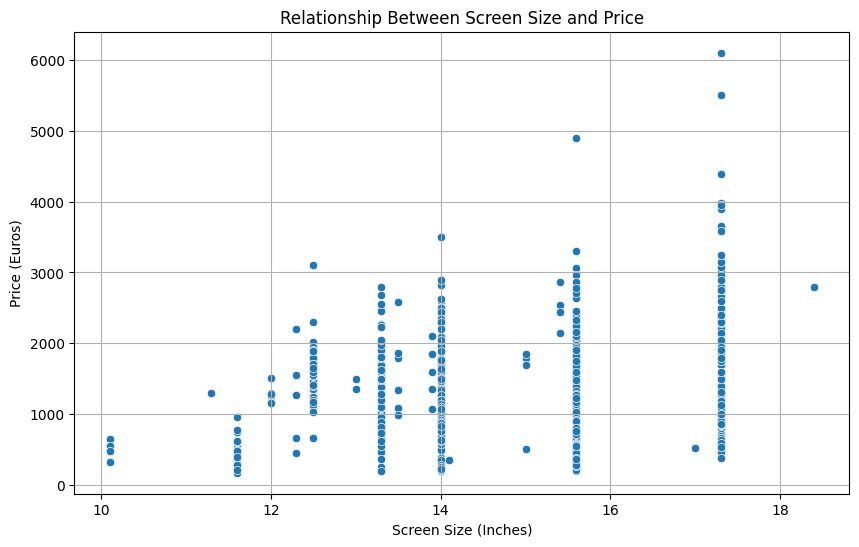

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inches', y='Price_euros', data=df)
plt.title('Relationship Between Screen Size and Price')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price (Euros)')
plt.grid(True)
plt.show()


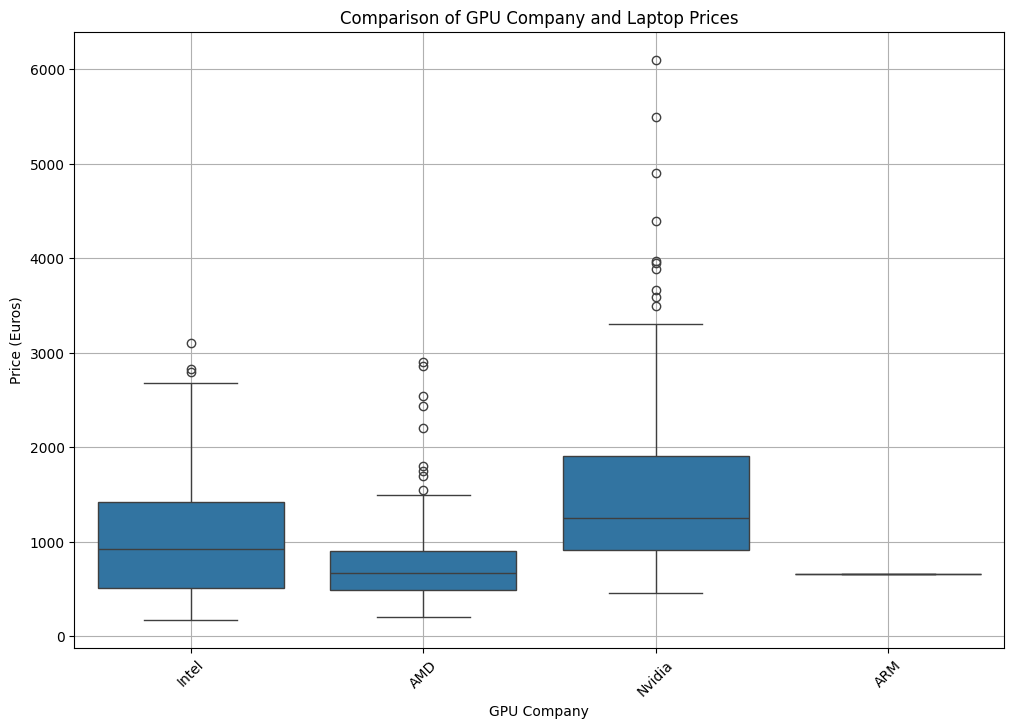

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='GPU_company', y='Price_euros', data=df)
plt.title('Comparison of GPU Company and Laptop Prices')
plt.xlabel('GPU Company')
plt.ylabel('Price (Euros)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

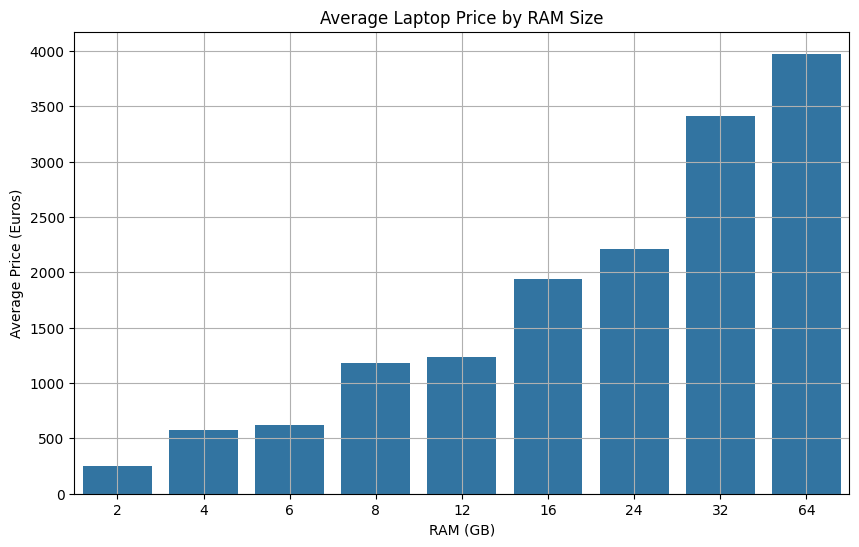

In [9]:
plt.figure(figsize=(10, 6))

ram_vs_price = df.groupby('Ram')['Price_euros'].mean().reset_index()

sns.barplot(x='Ram', y='Price_euros', data=ram_vs_price)

plt.title('Average Laptop Price by RAM Size')
plt.xlabel('RAM (GB)')
plt.ylabel('Average Price (Euros)')
plt.grid(True)
plt.show()

C:\Users\orlan\AppData\Local\Temp\ipykernel_31472\1569016773.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CPU_model', y='Price_euros', data=cpu_vs_price, palette=colors)


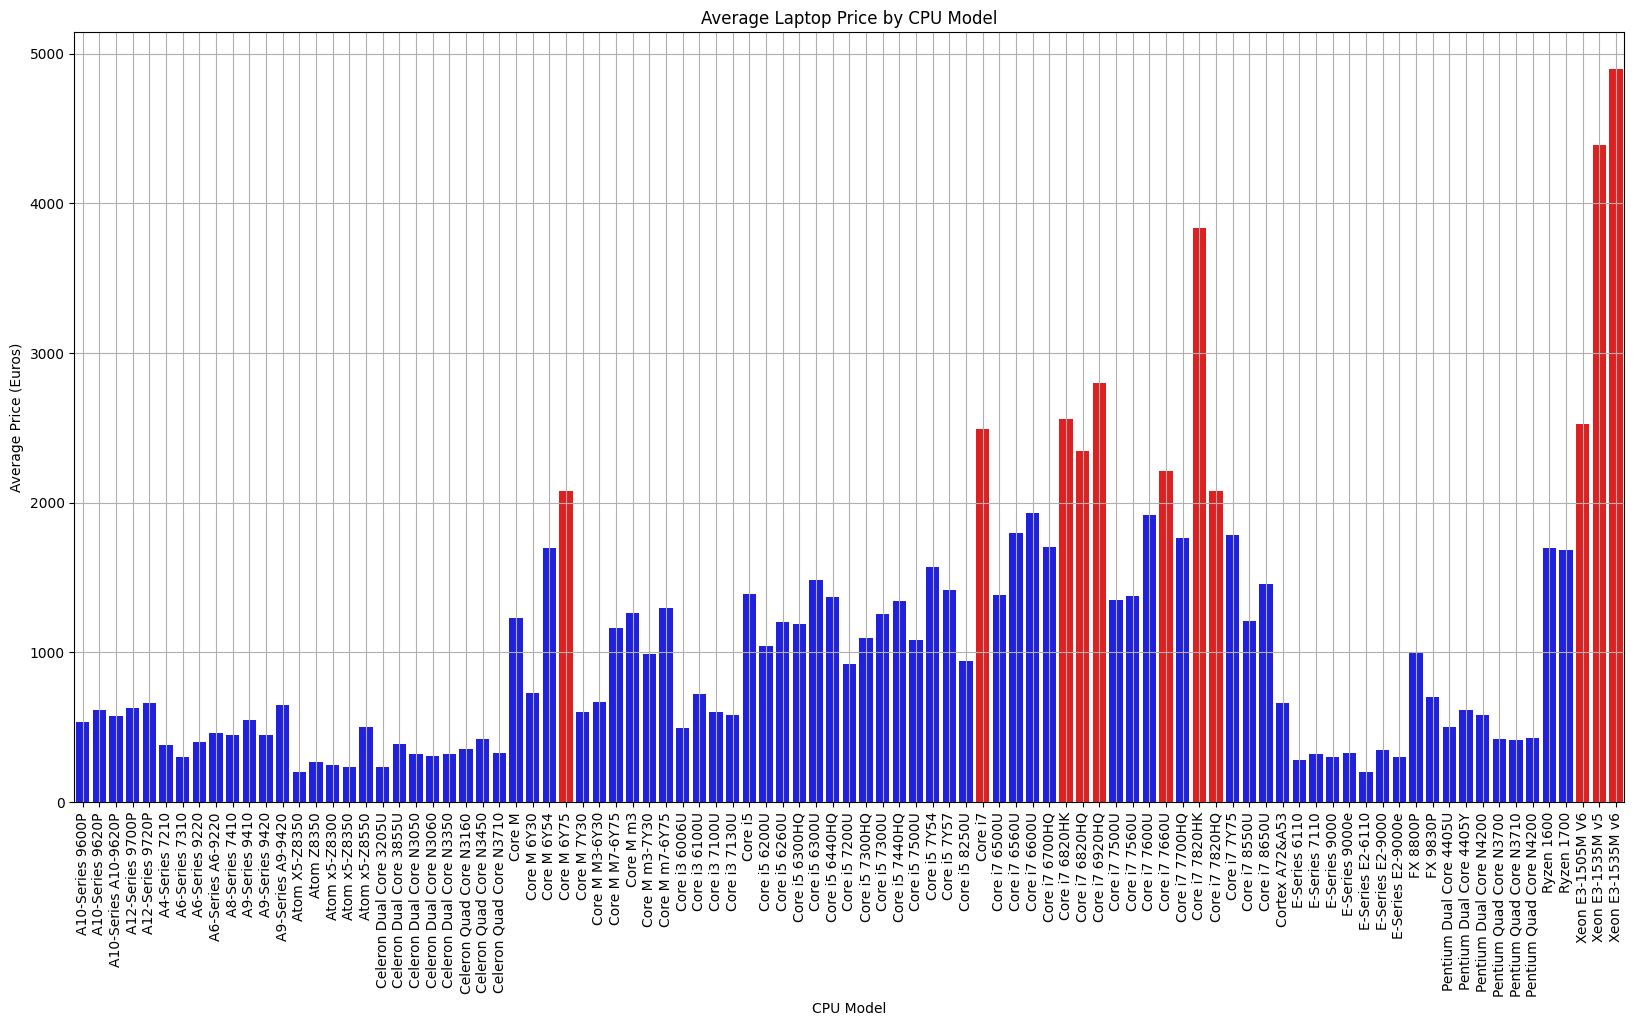

In [10]:
plt.figure(figsize=(20, 10))

cpu_vs_price = df.groupby('CPU_model')['Price_euros'].mean().reset_index()

colors = ['red' if price > 2000 else 'blue' for price in cpu_vs_price['Price_euros']]

sns.barplot(x='CPU_model', y='Price_euros', data=cpu_vs_price, palette=colors)

plt.xticks(rotation=90)

plt.title('Average Laptop Price by CPU Model')
plt.xlabel('CPU Model')
plt.ylabel('Average Price (Euros)')
plt.grid(True)
plt.show()

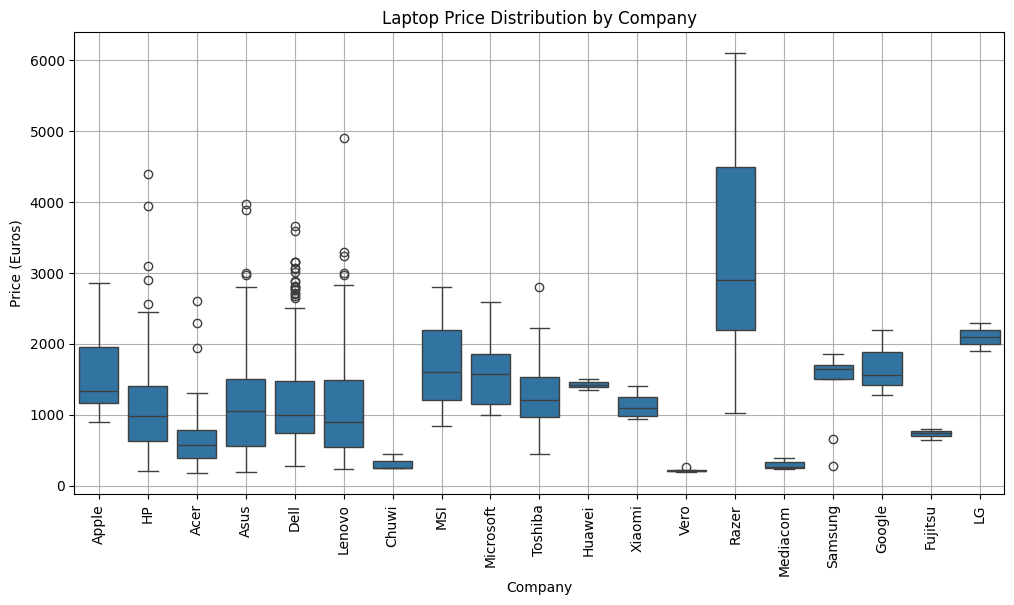

In [11]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='Company', y='Price_euros', data=df)

plt.xticks(rotation=90)

plt.title('Laptop Price Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Price (Euros)')
plt.grid(True)
plt.show()

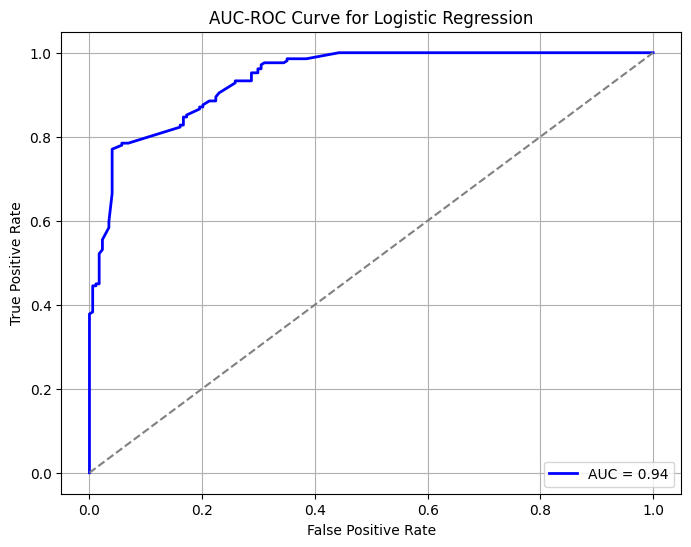

In [12]:
df['Price_category'] = (df['Price_euros'] > df['Price_euros'].median()).astype(int)

features = ['CPU_model', 'CPU_company', 'Ram', 'GPU_company', 'GPU_model']
x = pd.get_dummies(df[features], drop_first=True) 
y = df['Price_category']

train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state=1)

logreg = LogisticRegression(max_iter=1000, random_state=1)
logreg.fit(train_x, train_y)

train_probs = logreg.predict_proba(train_x)[:, 1]
valid_probs = logreg.predict_proba(valid_x)[:, 1]
train_preds = logreg.predict(train_x)
valid_preds = logreg.predict(valid_x)

fpr, tpr, _ = roc_curve(valid_y, valid_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('AUC-ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

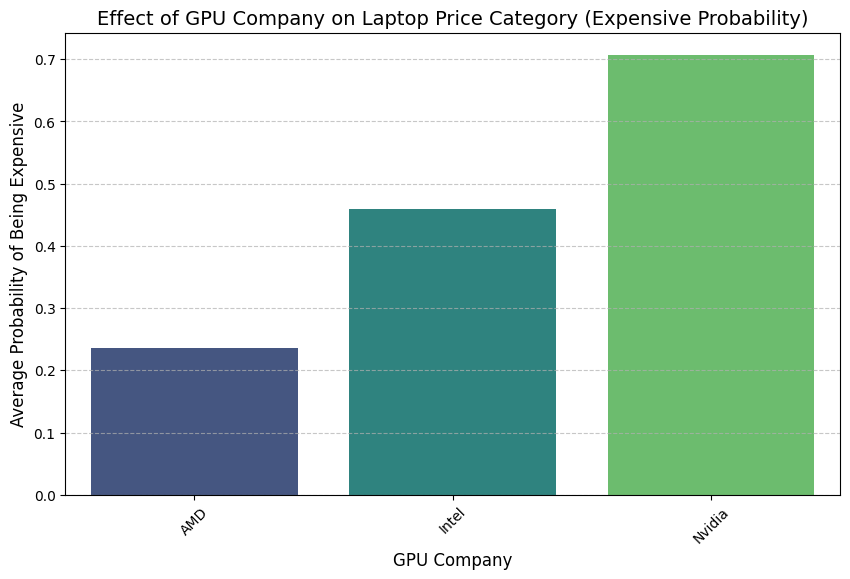

In [13]:
valid_data = valid_x.copy()
valid_data['GPU_company'] = df.loc[valid_data.index, 'GPU_company']
valid_data['Expensive_Prob'] = valid_probs
valid_data['Price_category'] = valid_y

gpu_effect = valid_data.groupby('GPU_company')['Expensive_Prob'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=gpu_effect.index, y=gpu_effect.values, palette='viridis', hue=gpu_effect.index, legend=False)
plt.title('Effect of GPU Company on Laptop Price Category (Expensive Probability)', fontsize=14)
plt.xlabel('GPU Company', fontsize=12)
plt.ylabel('Average Probability of Being Expensive', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


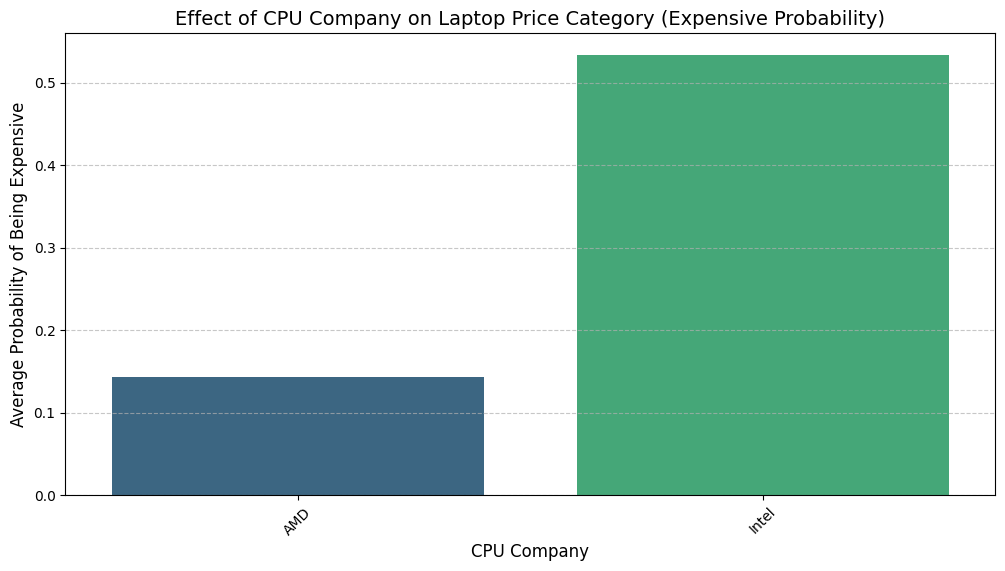

In [14]:
valid_data = valid_x.copy()
valid_data['CPU_company'] = df.loc[valid_data.index, 'CPU_company']
valid_data['Expensive_Prob'] = valid_probs
valid_data['Price_category'] = valid_y

cpu_effect = valid_data.groupby('CPU_company')['Expensive_Prob'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=cpu_effect.index, y=cpu_effect.values, palette='viridis', hue=cpu_effect.index, legend=False)

plt.title('Effect of CPU Company on Laptop Price Category (Expensive Probability)', fontsize=14)
plt.xlabel('CPU Company', fontsize=12)
plt.ylabel('Average Probability of Being Expensive', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


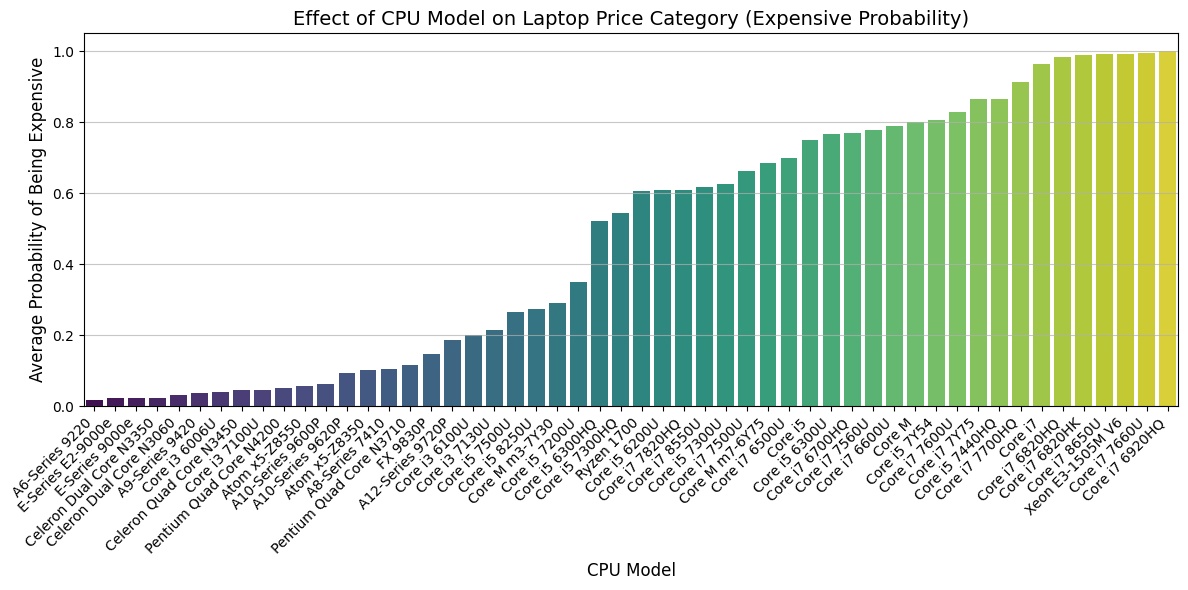

In [15]:
valid_data = valid_x.copy()
valid_data['CPU_model'] = df.loc[valid_data.index, 'CPU_model']
valid_data['Expensive_Prob'] = valid_probs
valid_data['Price_category'] = valid_y

cpu_effect = valid_data.groupby('CPU_model')['Expensive_Prob'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=cpu_effect.index, y=cpu_effect.values, palette='viridis', hue=cpu_effect.index, legend=False)
plt.title('Effect of CPU Model on Laptop Price Category (Expensive Probability)', fontsize=14)
plt.xlabel('CPU Model', fontsize=12)
plt.ylabel('Average Probability of Being Expensive', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()


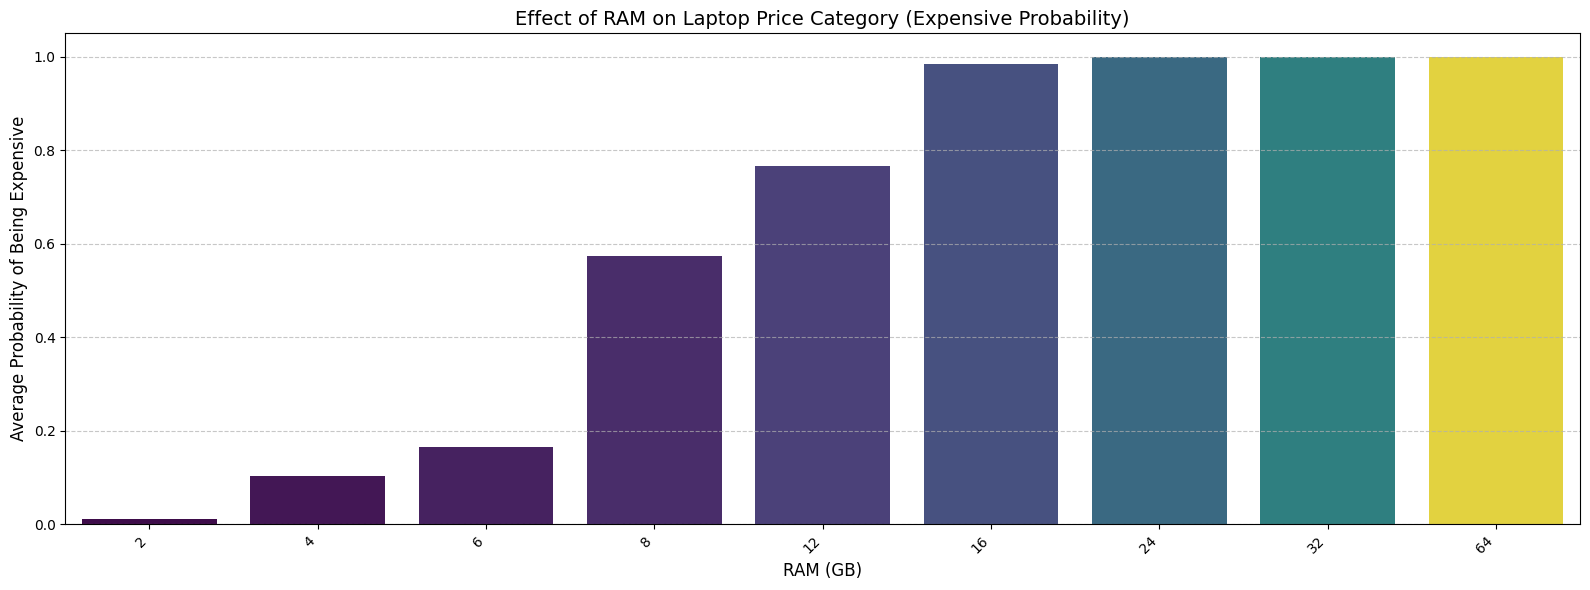

In [16]:
valid_data = valid_x.copy()
valid_data['Ram'] = df.loc[valid_data.index, 'Ram']
valid_data['Expensive_Prob'] = valid_probs
valid_data['Price_category'] = valid_y

ram_effect = valid_data.groupby('Ram')['Expensive_Prob'].mean().sort_values()

plt.figure(figsize=(16, 6))  
sns.barplot(x=ram_effect.index, y=ram_effect.values, palette='viridis', hue=ram_effect.index, legend=False)
plt.title('Effect of RAM on Laptop Price Category (Expensive Probability)', fontsize=14)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Average Probability of Being Expensive', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


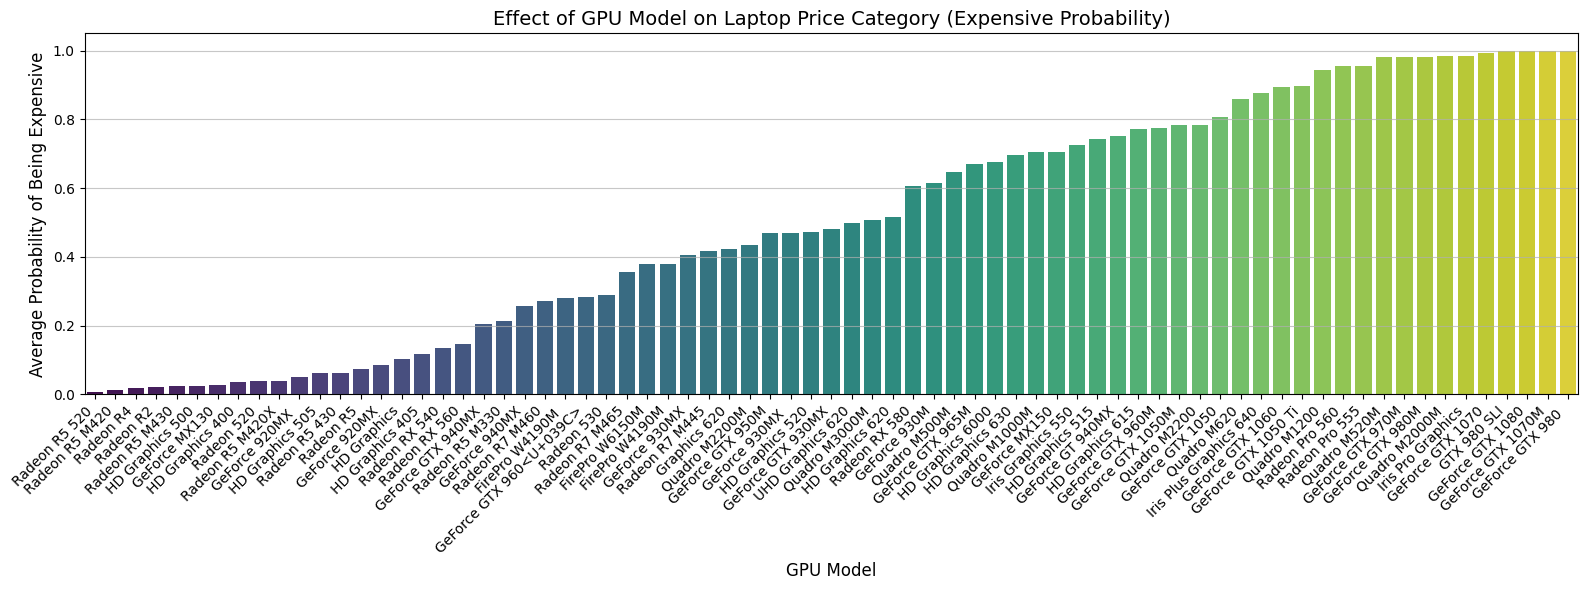

In [17]:
valid_data = valid_x.copy()
valid_data['GPU_model'] = df.loc[valid_data.index, 'GPU_model']
valid_data['Expensive_Prob'] = valid_probs
valid_data['Price_category'] = valid_y

gpu_effect = valid_data.groupby('GPU_model')['Expensive_Prob'].mean().sort_values()

plt.figure(figsize=(16, 6)) 
sns.barplot(x=gpu_effect.index, y=gpu_effect.values, palette='viridis', hue=gpu_effect.index, legend=False)
plt.title('Effect of GPU Model on Laptop Price Category (Expensive Probability)', fontsize=14)
plt.xlabel('GPU Model', fontsize=12)
plt.ylabel('Average Probability of Being Expensive', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout() 
plt.show()


Confusion Matrix (Accuracy 0.7321)

       Prediction
Actual   0   1
     0 413  53
     1 186 240
Confusion Matrix (Accuracy 0.7363)

       Prediction
Actual   0   1
     0 157  17
     1  84 125


<Figure size 5000x1000 with 0 Axes>

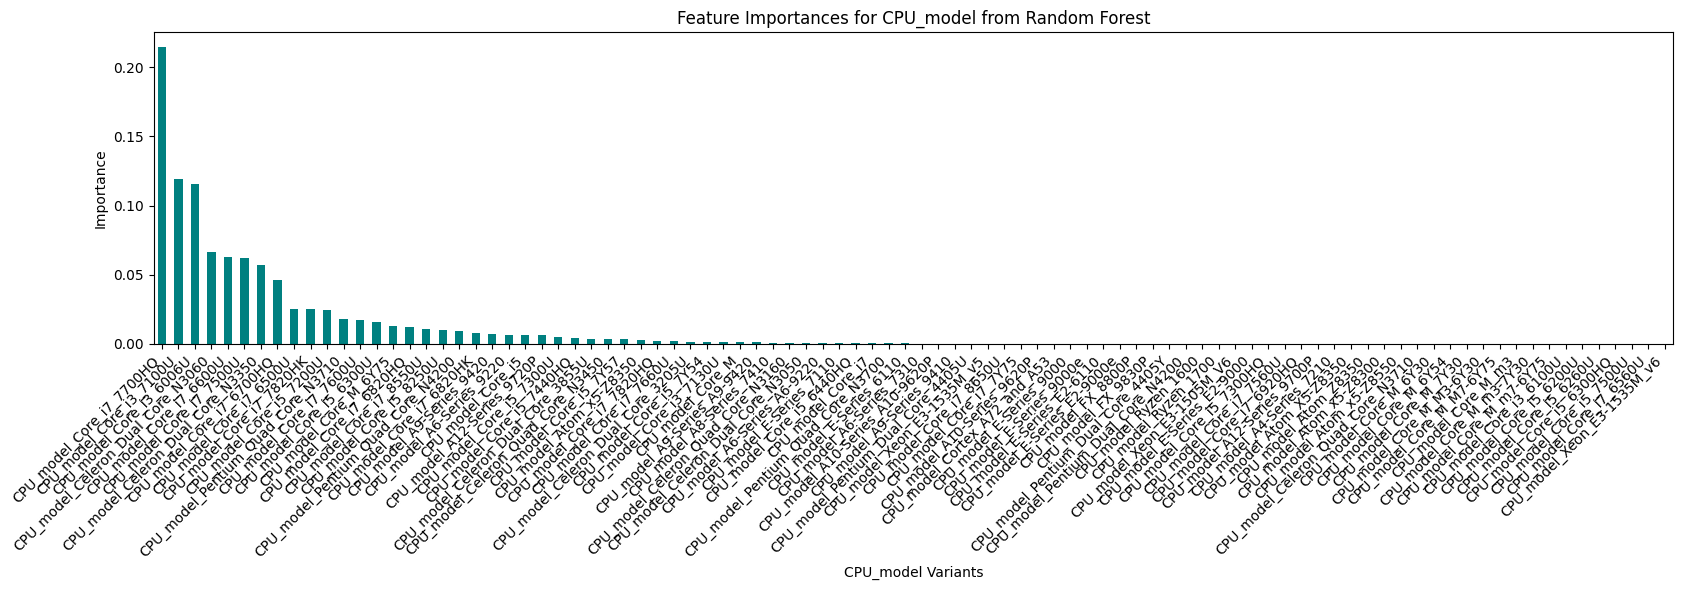

In [18]:
df['Price_category'] = (df['Price_euros'] > df['Price_euros'].median()).astype(int)

features = ['CPU_model']
x = pd.get_dummies(df[features], drop_first=True) 
y = df['Price_category']

x.columns = [col.replace(' ', '_').replace('&', '_and_').replace('<', 'lt').replace('>', 'gt') 
             if 'CPU_model' in col else col for col in x.columns]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1)

rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=1) 
rf.fit(train_x, train_y)

classificationSummary(train_y, rf.predict(train_x))
classificationSummary(test_y, rf.predict(test_x))

single_tree = rf.estimators_[0]
plt.figure(figsize=(50, 10))
plotDecisionTree(single_tree, feature_names=x.columns, class_names=['Budget', 'Expensive'])
plt.show()

feature_importances = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(17, 6))
feature_importances.plot(kind='bar', color='teal')
plt.title('Feature Importances for CPU_model from Random Forest')
plt.xlabel('CPU_model Variants')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


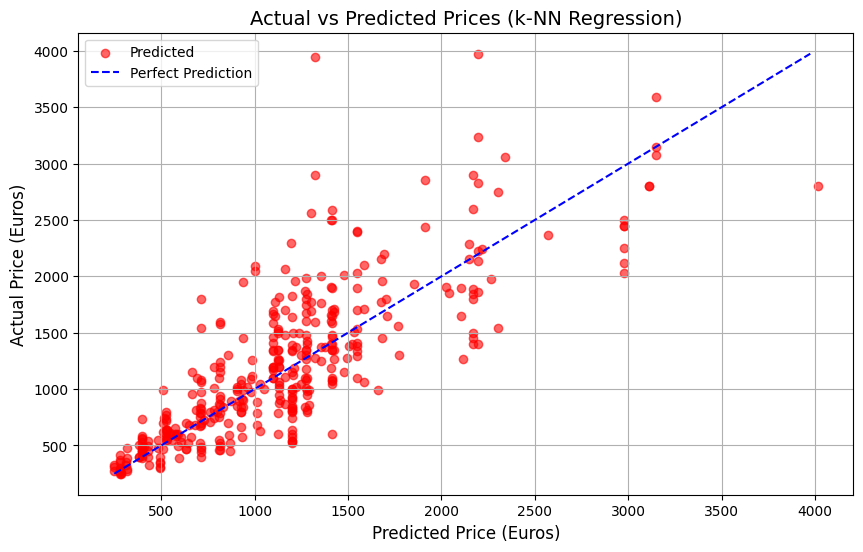

In [21]:
features = ['CPU_model', 'CPU_company', 'Ram', 'GPU_company', 'GPU_model']
x = pd.get_dummies(df[features], drop_first=True)
y = df['Price_euros']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=1)

knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(x_train, y_train)

y_train_pred = knn.predict(x_train)
y_valid_pred = knn.predict(x_valid)

plt.figure(figsize=(10, 6))

plt.scatter(y_valid_pred, y_valid, color='red', alpha=0.6, label="Predicted")

plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='blue', linestyle='--', label="Perfect Prediction")

plt.title('Actual vs Predicted Prices (k-NN Regression)', fontsize=14)
plt.xlabel('Predicted Price (Euros)', fontsize=12)
plt.ylabel('Actual Price (Euros)', fontsize=12)
plt.legend(loc='best')
plt.grid(True)

plt.show()